# **Logistic Regression**  
### *Regresja logistyczna*

---

## **English**

Logistic regression is a statistical method used for binary classification problems. Unlike linear regression which predicts continuous values, logistic regression predicts the probability that an instance belongs to a particular class (usually coded as 0 or 1).

The logistic regression model uses the logistic function (also known as the sigmoid function) to map any real-valued number to a value between 0 and 1:

$$
p(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}
$$

where $p(y=1|x)$ is the probability that $y = 1$ given the input features $x$.

### **Log-Odds (Logit)**

The logistic regression model is based on the log-odds (logit) transformation:

$$
\text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

This transformation allows us to model the relationship between features and the log-odds of the positive class.

---

## **Polish**

Regresja logistyczna to metoda statystyczna używana do problemów klasyfikacji binarnej. W przeciwieństwie do regresji liniowej, która przewiduje wartości ciągłe, regresja logistyczna przewiduje prawdopodobieństwo, że dana instancja należy do określonej klasy (zwykle kodowanej jako 0 lub 1).

Model regresji logistycznej wykorzystuje funkcję logistyczną (zwaną również funkcją sigmoidalną) do mapowania dowolnej liczby rzeczywistej na wartość między 0 a 1:

$$
p(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}
$$

gdzie $p(y=1|x)$ to prawdopodobieństwo, że $y = 1$ dla danych cech wejściowych $x$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
import seaborn as sns

# Generate a binary classification dataset
# Generowanie zbioru danych dla klasyfikacji binarnej
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, random_state=42)

# Split the data into training and test sets
# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
# Tworzenie i trenowanie modelu regresji logistycznej
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
# Przewidywania
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate metrics
# Obliczenie metryk
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy | Dokładność modelu: {accuracy:.3f}")
print(f"\nCoefficients | Współczynniki: {log_reg.coef_[0]}")
print(f"Intercept | Wyraz wolny: {log_reg.intercept_[0]:.3f}")

print("\nClassification Report | Raport klasyfikacji:")
print(classification_report(y_test, y_pred))


Model Accuracy | Dokładność modelu: 0.900

Coefficients | Współczynniki: [-0.52914131  3.36138003]
Intercept | Wyraz wolny: 1.240

Classification Report | Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



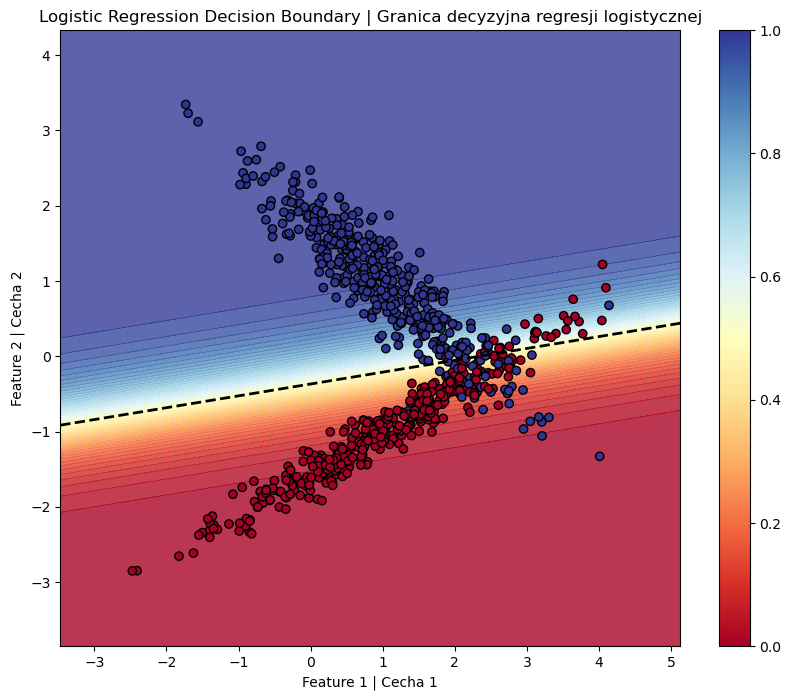

In [2]:
# Visualization of the decision boundary
# Wizualizacja granicy decyzyjnej

def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(10, 8))
    
    # Create a mesh to plot the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)
    
    # Plot the data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.colorbar(scatter)
    
    plt.title(title)
    plt.xlabel('Feature 1 | Cecha 1')
    plt.ylabel('Feature 2 | Cecha 2')
    plt.show()

# Plot decision boundary for training data
plot_decision_boundary(X_train, y_train, log_reg, 
                      'Logistic Regression Decision Boundary | Granica decyzyjna regresji logistycznej')
